<a href="https://colab.research.google.com/github/itsamepetros/BigData2021/blob/main/Lab6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models
import json
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import torchvision.models as models

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.is_available()

cuda:0


True

In [ ]:
!wget -O imagenet.json https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

with open('imagenet.json') as f:
    cls_dict = json.loads(f.read())

In [ ]:
category1, category2, category3, category4 = random.sample(list(cls_dict.values()),4)
print(category1, category2, category3, category4)

In [3]:
class CustomDataset(Dataset):
    def __init__(self, transform=None):
        self.imgs_path = "/Project/ImageNet_Dataset/"
        file_list = glob.glob(self.imgs_path + "*")
        print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpg"):
                self.data.append([img_path, class_name])
        print(self.data)
        self.class_map = {"agama" : 0, "cat" : 1, "dog" : 2, "racket" : 3, "sea" : 4}
        self.img_dim = (256, 256)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        class_id = torch.tensor([class_id])
        return img_tensor, class_id


In [4]:
normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.CenterCrop(224),
    normalize
])

In [5]:
if __name__ == "__main__":
    dataset = CustomDataset(transform=preprocess)
    data_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

print(len(dataset))
print(dataset[14])


['/Project/ImageNet_Dataset/racket', '/Project/ImageNet_Dataset/sea', '/Project/ImageNet_Dataset/agama', '/Project/ImageNet_Dataset/dog', '/Project/ImageNet_Dataset/cat']
[['/Project/ImageNet_Dataset/racket/4.jpg', 'racket'], ['/Project/ImageNet_Dataset/racket/2.jpg', 'racket'], ['/Project/ImageNet_Dataset/racket/1.jpg', 'racket'], ['/Project/ImageNet_Dataset/racket/3.jpg', 'racket'], ['/Project/ImageNet_Dataset/sea/4.jpg', 'sea'], ['/Project/ImageNet_Dataset/sea/2.jpg', 'sea'], ['/Project/ImageNet_Dataset/sea/1.jpg', 'sea'], ['/Project/ImageNet_Dataset/sea/3.jpg', 'sea'], ['/Project/ImageNet_Dataset/agama/4.jpg', 'agama'], ['/Project/ImageNet_Dataset/agama/2.jpg', 'agama'], ['/Project/ImageNet_Dataset/agama/1.jpg', 'agama'], ['/Project/ImageNet_Dataset/agama/3.jpg', 'agama'], ['/Project/ImageNet_Dataset/dog/4.jpg', 'dog'], ['/Project/ImageNet_Dataset/dog/2.jpg', 'dog'], ['/Project/ImageNet_Dataset/dog/1.jpg', 'dog'], ['/Project/ImageNet_Dataset/dog/3.jpg', 'dog'], ['/Project/ImageNet_

In [6]:
for img, label in data_loader:
    print("Images has shape: ",img.shape)
    print("Labels has shape: ", label.shape)

label

img.dtype

Images has shape:  torch.Size([20, 3, 256, 256])
Labels has shape:  torch.Size([20, 1])


torch.uint8

In [7]:
resnet18 = models.resnet18(pretrained=True).to(device)
gn = models.googlenet(pretrained=True).to(device)
sn = models.shufflenet_v2_x1_0(pretrained=True).to(device)
dn = models.densenet161(pretrained=True).to(device)
alexnet = models.alexnet(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


Apply our Dataset to the models

In [8]:
for i, data in enumerate(data_loader):

    img, label = data

    if torch.cuda.is_available():
        x, y = img.cuda(), label.cuda()
        out = resnet18(x.float()).cuda()
        rn_probs, rn_cls_indices = torch.nn.functional.softmax(out, dim=-1).topk(5)
print('Resnet18 Done!')

Resnet18 Done!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
for i, data in enumerate(data_loader):

    img, label = data

    if torch.cuda.is_available():
        x, y = img.cuda(), label.cuda()
        out = gn(x.float()).cuda()
        gn_probs, gn_cls_indices = torch.nn.functional.softmax(out, dim=-1).topk(5)
print('Googlenet Done!')

Googlenet Done!


In [10]:
for i, data in enumerate(data_loader):

    img, label = data

    if torch.cuda.is_available():
        x, y = img.cuda(), label.cuda()
        out = sn(x.float()).cuda()
        sn_probs, sn_cls_indices = torch.nn.functional.softmax(out, dim=-1).topk(5)
print('Shufflnet Done!')

Shufflnet Done!


In [11]:
for i, data in enumerate(data_loader):

    img, label = data

    if torch.cuda.is_available():
        x, y = img.cuda(), label.cuda()
        out = dn(x.float()).cuda()
        dn_probs, dn_cls_indices = torch.nn.functional.softmax(out, dim=-1).topk(5)
print('Densenet Done!')

Densenet Done!


In [12]:
for i, data in enumerate(data_loader):

    img, label = data

    if torch.cuda.is_available():
        x, y = img.cuda(), label.cuda()
        out = alexnet(x.float()).cuda()
        an_probs, an_cls_indices = torch.nn.functional.softmax(out, dim=-1).topk(5)
print('Alexnet Done!')

Alexnet Done!


In [14]:
rn_cls_labels = [cls_dict[str(int(i))][-1] for i in rn_cls_indices.to('cpu').view(-1)]
gn_cls_labels = [cls_dict[str(int(i))][-1] for i in gn_cls_indices.to('cpu').view(-1)]
sn_cls_labels = [cls_dict[str(int(i))][-1] for i in sn_cls_indices.to('cpu').view(-1)]
dn_cls_labels = [cls_dict[str(int(i))][-1] for i in dn_cls_indices.to('cpu').view(-1)]
an_cls_labels = [cls_dict[str(int(i))][-1] for i in an_cls_indices.to('cpu').view(-1)]

rn_probs = rn_probs.detach().cpu().numpy().squeeze() * 100
gn_probs = gn_probs.detach().cpu().numpy().squeeze() * 100
sn_probs = sn_probs.detach().cpu().numpy().squeeze() * 100
dn_probs = dn_probs.detach().cpu().numpy().squeeze() * 100
an_probs = an_probs.detach().cpu().numpy().squeeze() * 100

Racket Class |  Resnet18
#1: hard_disc -- 5.6%
#2: scale -- 4.1%
#3: racket -- 3.7%
#4: spotlight -- 2.8%
#5: modem -- 2.3%
#6: racket -- 77.0%
#7: tennis_ball -- 2.0%
#8: maraca -- 1.3%
#9: wine_bottle -- 1.2%
#10: scale -- 0.6%
#11: racket -- 80.6%
#12: tennis_ball -- 6.1%
#13: croquet_ball -- 1.4%
#14: bow -- 0.9%
#15: golf_ball -- 0.9%
#16: racket -- 29.5%
#17: strainer -- 8.1%
#18: fire_screen -- 6.7%
#19: loupe -- 6.3%
#20: electric_fan -- 3.4%


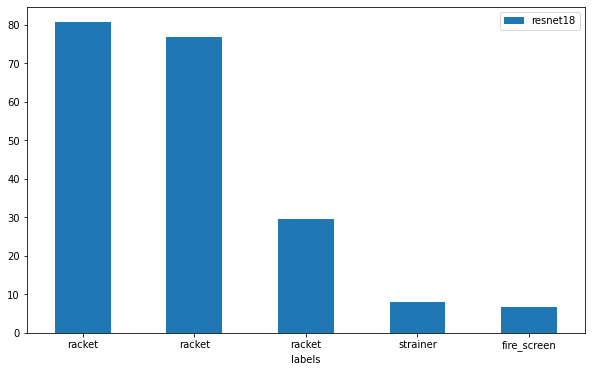

In [15]:
print('Racket Class |  Resnet18')
for i in range(20):
    print(f"#{i+1}: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
racket = rn_probs[:4].flatten()
df = pd.DataFrame(racket, columns = ['resnet18'])
racket_label = rn_cls_labels[:20]
df['labels'] = racket_label
racket_resnet = df.sort_values(by=['resnet18'], ascending=False)
racket5_rn18 = racket_resnet.head(5)
ax = racket5_rn18.plot.bar(x='labels', y='resnet18', rot=0, figsize=(10,6))

Racket class  |  Alexnet
#1: tennis_ball -- 100.0%
#2: muzzle -- 0.0%
#3: racket -- 0.0%
#4: spotlight -- 0.0%
#5: space_heater -- 0.0%
#6: tennis_ball -- 100.0%
#7: spotlight -- 0.0%
#8: table_lamp -- 0.0%
#9: microphone -- 0.0%
#10: caldron -- 0.0%
#11: racket -- 100.0%
#12: great_white_shark -- 0.0%
#13: tench -- 0.0%
#14: tiger_shark -- 0.0%
#15: goldfish -- 0.0%
#16: tennis_ball -- 100.0%
#17: fire_screen -- 0.0%
#18: window_screen -- 0.0%
#19: goldfish -- 0.0%
#20: tench -- 0.0%


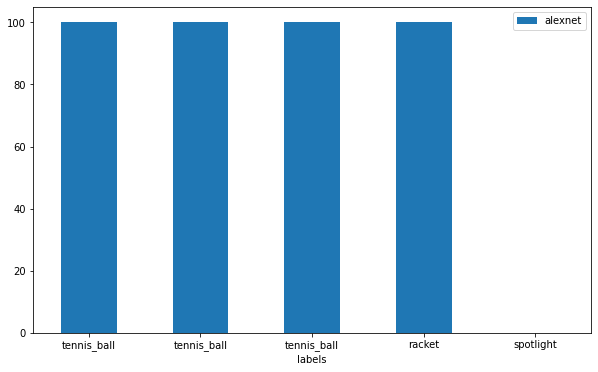

In [ ]:
print('Racket class  |  Alexnet')
for i in range(20):
    print(f"#{i+1}: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
racket = an_probs[:4].flatten()
df = pd.DataFrame(racket, columns = ['alexnet'])
racket_label = an_cls_labels[:20]
df['labels'] = racket_label
racket_alexnet = df.sort_values(by=['alexnet'], ascending=False)
racket5_an = racket_alexnet.head(5)
ax = racket5_an.plot.bar(x='labels', y='alexnet', rot=0, figsize=(10,6))

Racket class  |  GoogleNet
#1: racket -- 4.6%
#2: magnetic_compass -- 3.6%
#3: running_shoe -- 3.4%
#4: barometer -- 2.9%
#5: stopwatch -- 2.2%
#6: racket -- 23.8%
#7: electric_fan -- 12.1%
#8: strainer -- 5.1%
#9: spotlight -- 1.9%
#10: ping-pong_ball -- 1.5%
#11: racket -- 71.3%
#12: stethoscope -- 1.2%
#13: tennis_ball -- 1.2%
#14: magnetic_compass -- 0.8%
#15: loupe -- 0.6%
#16: racket -- 13.5%
#17: sunglass -- 11.5%
#18: sunglasses -- 7.7%
#19: fire_screen -- 4.5%
#20: strainer -- 2.4%


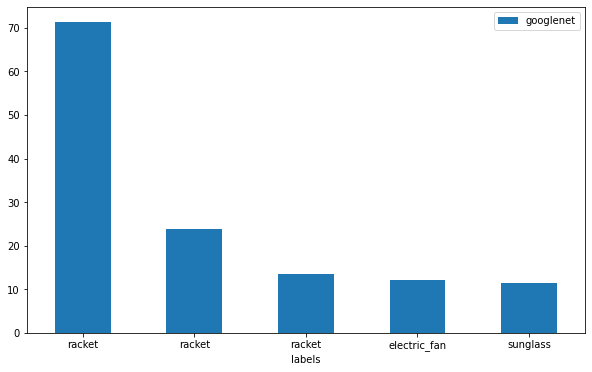

In [ ]:
print('Racket class  |  GoogleNet')
for i in range(20):
    print(f"#{i+1}: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
racket = gn_probs[:4].flatten()
df = pd.DataFrame(racket, columns = ['googlenet'])
racket_label = gn_cls_labels[:20]
df['labels'] = racket_label
racket_googlenet = df.sort_values(by=['googlenet'], ascending=False)
racket5_gn = racket_googlenet.head(5)
ax = racket5_gn.plot.bar(x='labels', y='googlenet', rot=0, figsize=(10,6))

Racket class  |  ShuffeNet
#1: scale -- 24.4%
#2: spotlight -- 7.7%
#3: racket -- 6.4%
#4: cellular_telephone -- 4.2%
#5: pedestal -- 2.1%
#6: racket -- 79.6%
#7: broom -- 1.4%
#8: crossword_puzzle -- 1.4%
#9: swab -- 0.6%
#10: pick -- 0.6%
#11: racket -- 67.3%
#12: shovel -- 4.6%
#13: walking_stick -- 2.8%
#14: trilobite -- 0.9%
#15: chainlink_fence -- 0.9%
#16: racket -- 97.4%
#17: spotlight -- 0.2%
#18: bow -- 0.2%
#19: bannister -- 0.1%
#20: electric_fan -- 0.1%


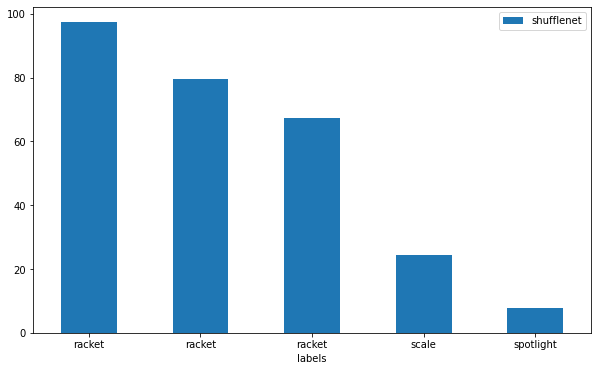

In [ ]:
print('Racket class  |  ShuffeNet')
for i in range(20):
    print(f"#{i+1}: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
racket = sn_probs[:4].flatten()
df = pd.DataFrame(racket, columns = ['shufflenet'])
racket_label = sn_cls_labels[:20]
df['labels'] = racket_label
racket_shufflenet = df.sort_values(by=['shufflenet'], ascending=False)
racket5_sn = racket_shufflenet.head(5)
ax = racket5_sn.plot.bar(x='labels', y='shufflenet', rot=0, figsize=(10,6))

Racket class  |  DenseNet
#1: racket -- 70.3%
#2: tennis_ball -- 3.6%
#3: scale -- 2.3%
#4: spotlight -- 2.2%
#5: strainer -- 0.9%
#6: racket -- 90.8%
#7: tennis_ball -- 5.4%
#8: electric_fan -- 0.7%
#9: microphone -- 0.7%
#10: ping-pong_ball -- 0.4%
#11: racket -- 84.3%
#12: shovel -- 3.3%
#13: tennis_ball -- 2.6%
#14: stethoscope -- 1.0%
#15: bolo_tie -- 0.7%
#16: racket -- 40.9%
#17: tennis_ball -- 17.7%
#18: strainer -- 4.2%
#19: loupe -- 3.7%
#20: spotlight -- 2.9%


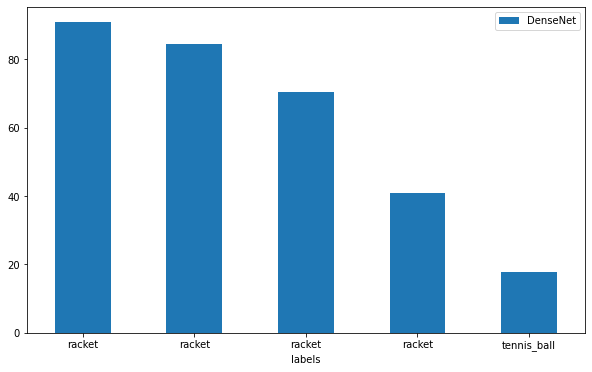

In [ ]:
print('Racket class  |  DenseNet')
for i in range(20):
    print(f"#{i+1}: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
racket = dn_probs[:4].flatten()
df = pd.DataFrame(racket, columns = ['DenseNet'])
racket_label = dn_cls_labels[:20]
df['labels'] = racket_label
racket_DenseNet = df.sort_values(by=['DenseNet'], ascending=False)
racket5_dn = racket_DenseNet.head(5)
ax = racket5_dn.plot.bar(x='labels', y='DenseNet', rot=0, figsize=(10,6))

sea cucumber class  |  Resnet18
#21: sea_cucumber -- 13.5%
#22: otter -- 7.9%
#23: brown_bear -- 7.0%
#24: boa_constrictor -- 5.6%
#25: tick -- 2.3%
#26: dough -- 14.1%
#27: banana -- 6.2%
#28: clog -- 5.0%
#29: sea_cucumber -- 4.1%
#30: bolete -- 4.0%
#31: sea_cucumber -- 30.5%
#32: hermit_crab -- 13.6%
#33: chocolate_sauce -- 10.4%
#34: meat_loaf -- 7.0%
#35: isopod -- 4.5%
#36: flatworm -- 25.9%
#37: sea_cucumber -- 18.4%
#38: eel -- 15.8%
#39: puffer -- 7.6%
#40: sea_anemone -- 7.5%


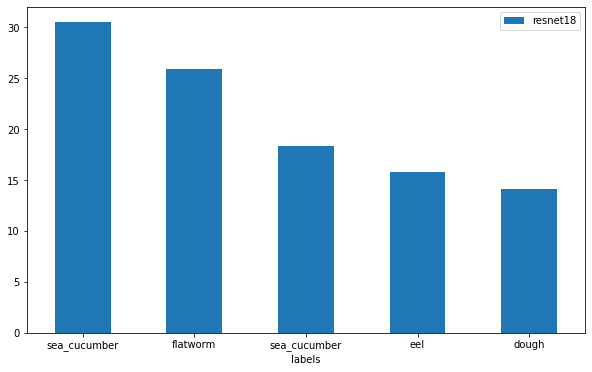

In [ ]:
print('sea cucumber class  |  Resnet18')
for i in range(20, 40):
    print(f"#{i+1}: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")

sea = rn_probs[4:8].flatten()
df = pd.DataFrame(sea, columns = ['resnet18'])
sea_label = rn_cls_labels[20:40]
df['labels'] = sea_label
sea_resnet = df.sort_values(by=['resnet18'], ascending=False)
sea5_rn18 = sea_resnet.head(5)
ax = sea5_rn18.plot.bar(x='labels', y='resnet18', rot=0, figsize=(10,6))

sea cucumber class  |  Alexnet
#21: nematode -- 99.9%
#22: digital_clock -- 0.1%
#23: spotlight -- 0.0%
#24: lampshade -- 0.0%
#25: maze -- 0.0%
#26: digital_clock -- 85.8%
#27: spotlight -- 13.3%
#28: screen -- 0.6%
#29: lampshade -- 0.1%
#30: car_mirror -- 0.1%
#31: digital_clock -- 53.5%
#32: window_shade -- 46.4%
#33: howler_monkey -- 0.1%
#34: spotlight -- 0.1%
#35: screen -- 0.0%
#36: digital_clock -- 100.0%
#37: window_screen -- 0.0%
#38: steel_arch_bridge -- 0.0%
#39: traffic_light -- 0.0%
#40: screen -- 0.0%


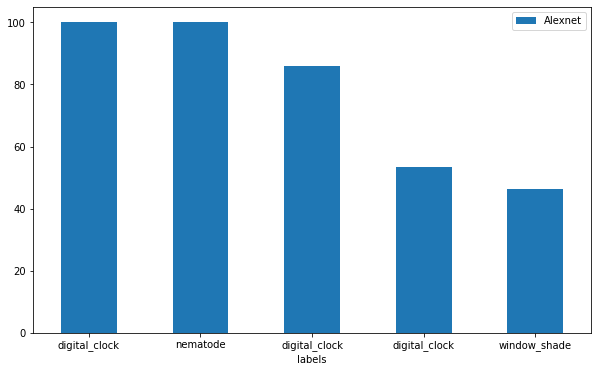

In [ ]:
print('sea cucumber class  |  Alexnet')
for i in range(20, 40):
    print(f"#{i+1}: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")

sea = an_probs[4:8].flatten()
df = pd.DataFrame(sea, columns = ['Alexnet'])
sea_label = an_cls_labels[20:40]
df['labels'] = sea_label
sea_alexnet = df.sort_values(by=['Alexnet'], ascending=False)
sea5_an = sea_alexnet.head(5)
ax = sea5_an.plot.bar(x='labels', y='Alexnet', rot=0, figsize=(10,6))

sea cucumber class  |  GoogleNet
#21: sea_lion -- 4.1%
#22: hippopotamus -- 2.8%
#23: sea_cucumber -- 2.4%
#24: sea_snake -- 2.2%
#25: boa_constrictor -- 2.1%
#26: eel -- 23.6%
#27: sea_cucumber -- 4.1%
#28: soup_bowl -- 1.9%
#29: mortar -- 1.8%
#30: bucket -- 1.6%
#31: gyromitra -- 6.9%
#32: sea_cucumber -- 6.2%
#33: dung_beetle -- 5.6%
#34: ostrich -- 3.3%
#35: miniature_poodle -- 2.5%
#36: sea_cucumber -- 20.5%
#37: centipede -- 13.3%
#38: spiny_lobster -- 11.8%
#39: starfish -- 10.8%
#40: sea_anemone -- 4.0%


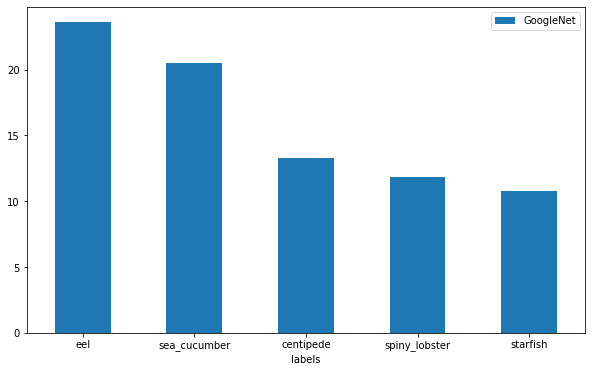

In [ ]:
print('sea cucumber class  |  GoogleNet')
for i in range(20, 40):
    print(f"#{i+1}: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")

sea = gn_probs[4:8].flatten()
df = pd.DataFrame(sea, columns = ['GoogleNet'])
sea_label = gn_cls_labels[20:40]
df['labels'] = sea_label
sea_googlenet = df.sort_values(by=['GoogleNet'], ascending=False)
sea5_gn = sea_googlenet.head(5)
ax = sea5_gn.plot.bar(x='labels', y='GoogleNet', rot=0, figsize=(10,6))

sea cucumber class  |  ShuffleNet
#21: sea_cucumber -- 22.8%
#22: English_springer -- 7.7%
#23: coral_reef -- 3.0%
#24: teddy -- 1.5%
#25: brown_bear -- 1.5%
#26: wombat -- 15.5%
#27: sea_cucumber -- 10.4%
#28: bucket -- 6.3%
#29: dugong -- 6.1%
#30: hay -- 5.6%
#31: chocolate_sauce -- 48.0%
#32: rock_python -- 3.1%
#33: stinkhorn -- 2.6%
#34: gyromitra -- 2.6%
#35: bison -- 1.9%
#36: bison -- 41.8%
#37: sea_cucumber -- 18.0%
#38: confectionery -- 7.5%
#39: anemone_fish -- 5.9%
#40: sea_anemone -- 4.7%


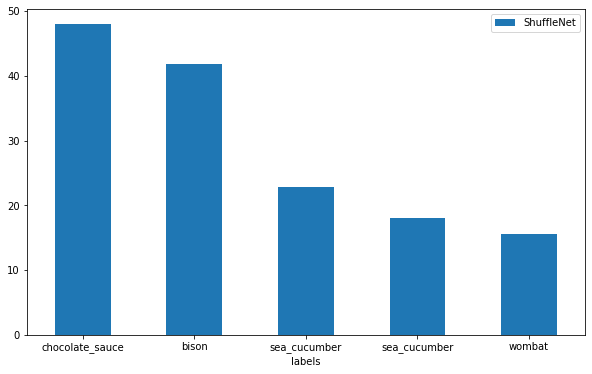

In [ ]:
print('sea cucumber class  |  ShuffleNet')
for i in range(20, 40):
    print(f"#{i+1}: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")

sea = sn_probs[4:8].flatten()
df = pd.DataFrame(sea, columns = ['ShuffleNet'])
sea_label = sn_cls_labels[20:40]
df['labels'] = sea_label
sea_shufflenet = df.sort_values(by=['ShuffleNet'], ascending=False)
sea5_sn = sea_shufflenet.head(5)
ax = sea5_sn.plot.bar(x='labels', y='ShuffleNet', rot=0, figsize=(10,6))

sea cucumber class  |  DenseNet
#21: sea_cucumber -- 41.6%
#22: weasel -- 2.6%
#23: otter -- 1.9%
#24: mink -- 1.9%
#25: ant -- 1.8%
#26: sea_cucumber -- 63.7%
#27: sea_slug -- 14.3%
#28: flatworm -- 2.2%
#29: isopod -- 1.5%
#30: mortar -- 1.3%
#31: sea_cucumber -- 23.2%
#32: ram -- 11.7%
#33: hippopotamus -- 8.2%
#34: tusker -- 6.6%
#35: African_elephant -- 5.9%
#36: sea_cucumber -- 71.2%
#37: sea_urchin -- 14.4%
#38: flatworm -- 3.5%
#39: starfish -- 1.9%
#40: puffer -- 1.7%


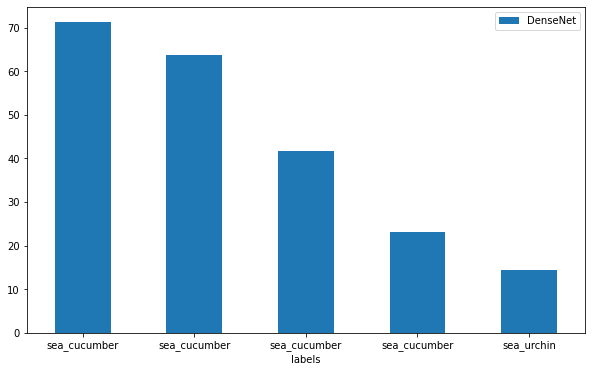

In [ ]:
print('sea cucumber class  |  DenseNet')
for i in range(20, 40):
    print(f"#{i+1}: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")

sea = dn_probs[4:8].flatten()
df = pd.DataFrame(sea, columns = ['DenseNet'])
sea_label = dn_cls_labels[20:40]
df['labels'] = sea_label
sea_densenet = df.sort_values(by=['DenseNet'], ascending=False)
sea5_dn = sea_densenet.head(5)
ax = sea5_dn.plot.bar(x='labels', y='DenseNet', rot=0, figsize=(10,6))

Agama class  |  Resnet18
#41: banded_gecko -- 18.8%
#42: African_chameleon -- 11.4%
#43: tailed_frog -- 7.2%
#44: letter_opener -- 6.3%
#45: alligator_lizard -- 5.6%
#46: fiddler_crab -- 62.1%
#47: rock_crab -- 10.7%
#48: starfish -- 10.6%
#49: hermit_crab -- 3.5%
#50: conch -- 1.0%
#51: common_newt -- 16.0%
#52: whiptail -- 15.4%
#53: American_alligator -- 10.1%
#54: axolotl -- 7.7%
#55: agama -- 7.0%
#56: agama -- 50.8%
#57: water_snake -- 11.4%
#58: ringneck_snake -- 7.9%
#59: alligator_lizard -- 6.5%
#60: garter_snake -- 3.5%


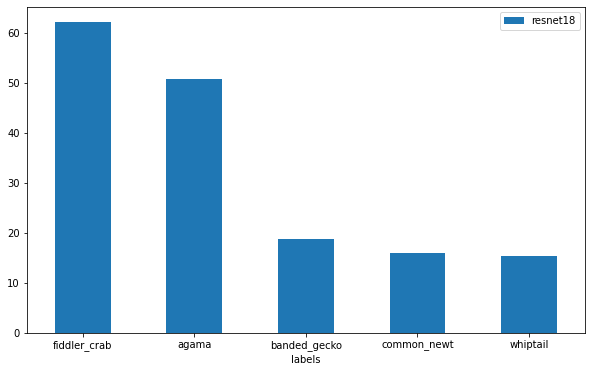

In [ ]:
print('Agama class  |  Resnet18')
for i in range(40, 60):
    print(f"#{i+1}: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
agama = rn_probs[8:12].flatten()
df = pd.DataFrame(agama, columns = ['resnet18'])
agama_label = rn_cls_labels[40:60]
df['labels'] = agama_label
agama_resnet = df.sort_values(by=['resnet18'], ascending=False)
agama5_rn18 = agama_resnet.head(5)
ax = agama5_rn18.plot.bar(x='labels', y='resnet18', rot=0, figsize=(10,6))

Agama class  |  Alexnet
#41: digital_clock -- 100.0%
#42: screen -- 0.0%
#43: spotlight -- 0.0%
#44: oscilloscope -- 0.0%
#45: traffic_light -- 0.0%
#46: magnetic_compass -- 65.7%
#47: television -- 32.2%
#48: umbrella -- 2.1%
#49: bubble -- 0.0%
#50: monitor -- 0.0%
#51: nematode -- 100.0%
#52: spotlight -- 0.0%
#53: analog_clock -- 0.0%
#54: radio -- 0.0%
#55: traffic_light -- 0.0%
#56: nematode -- 100.0%
#57: flatworm -- 0.0%
#58: shovel -- 0.0%
#59: street_sign -- 0.0%
#60: rhinoceros_beetle -- 0.0%


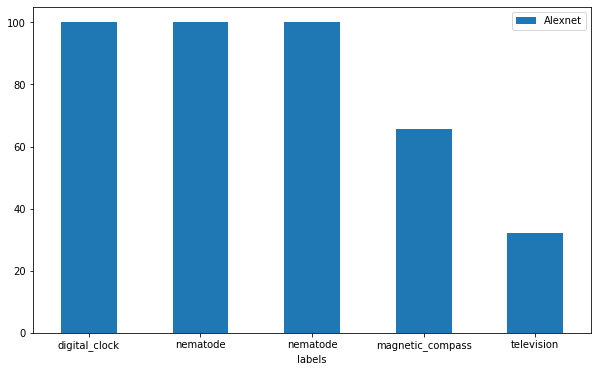

In [ ]:
print('Agama class  |  Alexnet')
for i in range(40, 60):
    print(f"#{i+1}: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")

agama = an_probs[8:12].flatten()
df = pd.DataFrame(agama, columns = ['Alexnet'])
agama_label = an_cls_labels[40:60]
df['labels'] = agama_label
agama_alexnet = df.sort_values(by=['Alexnet'], ascending=False)
agama5_an = agama_alexnet.head(5)
ax = agama5_an.plot.bar(x='labels', y='Alexnet', rot=0, figsize=(10,6))

Agama class  |  GoogleNet
#41: banded_gecko -- 8.5%
#42: tailed_frog -- 2.2%
#43: common_newt -- 2.2%
#44: whiptail -- 1.7%
#45: spotted_salamander -- 1.7%
#46: fiddler_crab -- 17.2%
#47: rock_crab -- 5.6%
#48: frilled_lizard -- 4.4%
#49: common_iguana -- 3.9%
#50: triceratops -- 3.2%
#51: whiptail -- 11.1%
#52: agama -- 9.9%
#53: common_newt -- 8.4%
#54: alligator_lizard -- 7.1%
#55: African_chameleon -- 5.7%
#56: agama -- 23.8%
#57: green_mamba -- 21.6%
#58: vine_snake -- 2.0%
#59: green_lizard -- 2.0%
#60: green_snake -- 1.9%


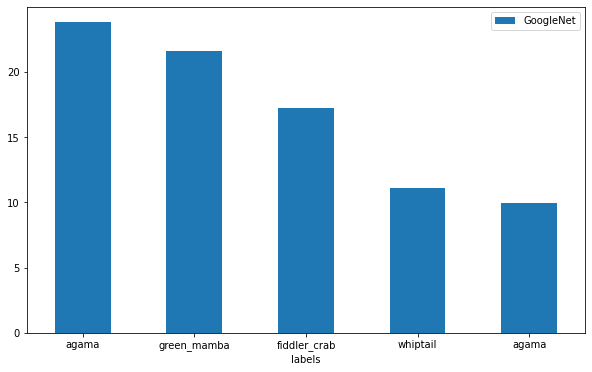

In [ ]:
print('Agama class  |  GoogleNet')
for i in range(40, 60):
    print(f"#{i+1}: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")

agama = gn_probs[8:12].flatten()
df = pd.DataFrame(agama, columns = ['GoogleNet'])
agama_label = gn_cls_labels[40:60]
df['labels'] = agama_label
agama_googlenet = df.sort_values(by=['GoogleNet'], ascending=False)
agama5_gn = agama_googlenet.head(5)
ax = agama5_gn.plot.bar(x='labels', y='GoogleNet', rot=0, figsize=(10,6))

Agama class  |  ShuffleNet
#41: ocarina -- 26.6%
#42: scorpion -- 14.1%
#43: American_lobster -- 6.1%
#44: frilled_lizard -- 3.2%
#45: spotted_salamander -- 2.2%
#46: frilled_lizard -- 14.9%
#47: pelican -- 8.4%
#48: birdhouse -- 5.0%
#49: red_wolf -- 3.4%
#50: scabbard -- 2.8%
#51: whiptail -- 9.6%
#52: American_alligator -- 8.8%
#53: American_chameleon -- 7.4%
#54: agama -- 6.8%
#55: banded_gecko -- 5.3%
#56: agama -- 67.8%
#57: ringneck_snake -- 4.3%
#58: European_fire_salamander -- 1.8%
#59: garter_snake -- 1.7%
#60: centipede -- 1.4%


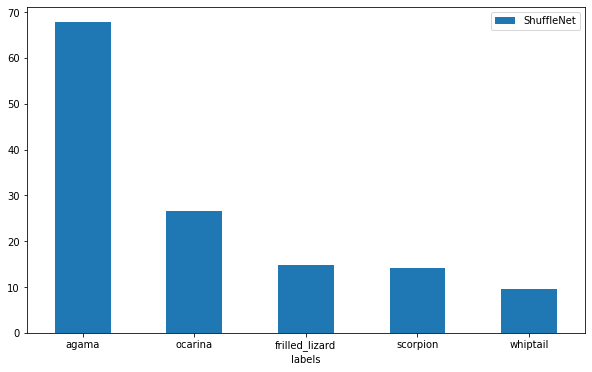

In [ ]:
print('Agama class  |  ShuffleNet')
for i in range(40, 60):
    print(f"#{i+1}: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")

agama = sn_probs[8:12].flatten()
df = pd.DataFrame(agama, columns = ['ShuffleNet'])
agama_label = sn_cls_labels[40:60]
df['labels'] = agama_label
agama_shufflenet = df.sort_values(by=['ShuffleNet'], ascending=False)
agama5_sn = agama_shufflenet.head(5)
ax = agama5_sn.plot.bar(x='labels', y='ShuffleNet', rot=0, figsize=(10,6))

Agama class  |  DenseNet
#41: banded_gecko -- 49.0%
#42: agama -- 11.8%
#43: alligator_lizard -- 8.3%
#44: whiptail -- 5.7%
#45: tailed_frog -- 3.4%
#46: frilled_lizard -- 42.3%
#47: rock_crab -- 9.5%
#48: fiddler_crab -- 9.2%
#49: agama -- 3.5%
#50: tailed_frog -- 1.8%
#51: agama -- 58.6%
#52: banded_gecko -- 6.6%
#53: whiptail -- 4.1%
#54: American_chameleon -- 4.0%
#55: common_iguana -- 3.3%
#56: agama -- 97.9%
#57: whiptail -- 0.3%
#58: alligator_lizard -- 0.2%
#59: American_chameleon -- 0.2%
#60: water_snake -- 0.2%


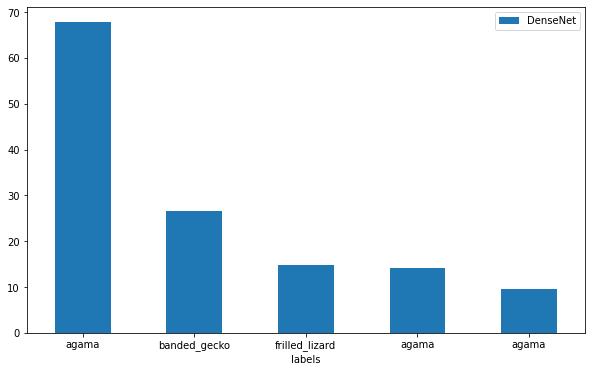

In [ ]:
print('Agama class  |  DenseNet')
for i in range(40, 60):
    print(f"#{i+1}: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")

agam = dn_probs[8:12].flatten()
df = pd.DataFrame(agama, columns = ['DenseNet'])
agama_label = dn_cls_labels[40:60]
df['labels'] = agama_label
agama_densenet = df.sort_values(by=['DenseNet'], ascending=False)
agama5_dn = agama_densenet.head(5)
ax = agama5_dn.plot.bar(x='labels', y='DenseNet', rot=0, figsize=(10,6))

Greater Swiss Mountain Dog class  |  Resnet18
#61: Appenzeller -- 24.2%
#62: EntleBucher -- 16.1%
#63: Greater_Swiss_Mountain_dog -- 13.4%
#64: Boston_bull -- 4.8%
#65: American_Staffordshire_terrier -- 4.3%
#66: Saint_Bernard -- 25.4%
#67: Great_Dane -- 13.3%
#68: Boston_bull -- 7.9%
#69: English_springer -- 7.1%
#70: Greater_Swiss_Mountain_dog -- 6.8%
#71: Greater_Swiss_Mountain_dog -- 11.9%
#72: Rhodesian_ridgeback -- 11.5%
#73: Labrador_retriever -- 6.0%
#74: vizsla -- 5.1%
#75: Appenzeller -- 4.4%
#76: Walker_hound -- 40.4%
#77: English_foxhound -- 13.3%
#78: Labrador_retriever -- 3.7%
#79: Greater_Swiss_Mountain_dog -- 3.5%
#80: Rhodesian_ridgeback -- 3.2%


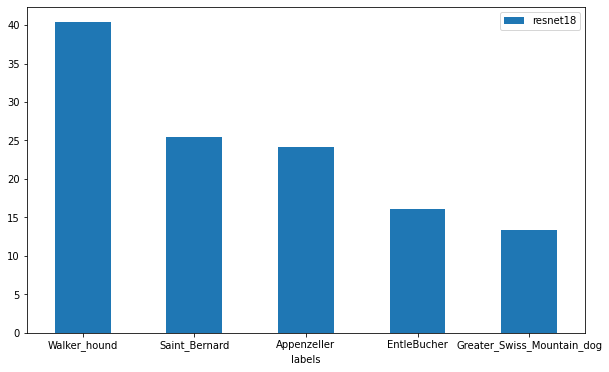

In [ ]:
print('Greater Swiss Mountain Dog class  |  Resnet18')
for i in range(60, 80):
    print(f"#{i+1}: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
dog = rn_probs[12:16].flatten()
df = pd.DataFrame(dog, columns = ['resnet18'])
dog_label = rn_cls_labels[60:80]
df['labels'] = dog_label
dog_resnet = df.sort_values(by=['resnet18'], ascending=False)
dog5_rn18 = dog_resnet.head(5)
ax = dog5_rn18.plot.bar(x='labels', y='resnet18', rot=0, figsize=(10,6))

Greater Swiss Mountain Dog class  |  Alexnet
#61: Bernese_mountain_dog -- 100.0%
#62: Border_collie -- 0.0%
#63: Greater_Swiss_Mountain_dog -- 0.0%
#64: Appenzeller -- 0.0%
#65: collie -- 0.0%
#66: chain -- 99.8%
#67: hourglass -- 0.2%
#68: hook -- 0.0%
#69: corkscrew -- 0.0%
#70: dial_telephone -- 0.0%
#71: Bernese_mountain_dog -- 100.0%
#72: Border_collie -- 0.0%
#73: lampshade -- 0.0%
#74: Greater_Swiss_Mountain_dog -- 0.0%
#75: parking_meter -- 0.0%
#76: traffic_light -- 100.0%
#77: whippet -- 0.0%
#78: cellular_telephone -- 0.0%
#79: screen -- 0.0%
#80: computer_keyboard -- 0.0%


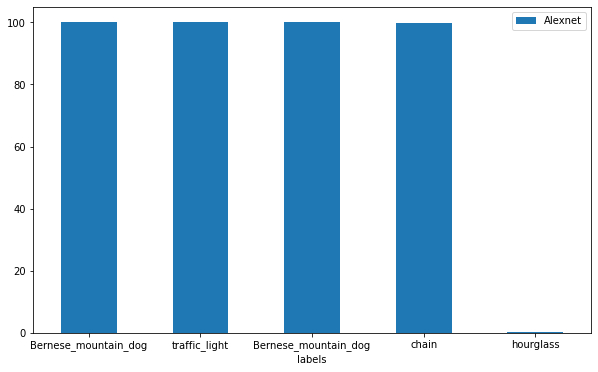

In [ ]:
print('Greater Swiss Mountain Dog class  |  Alexnet')
for i in range(60, 80):
    print(f"#{i+1}: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")

dog = an_probs[12:16].flatten()
df = pd.DataFrame(dog, columns = ['Alexnet'])
dog_label = an_cls_labels[60:80]
df['labels'] = dog_label
dog_alexnet = df.sort_values(by=['Alexnet'], ascending=False)
dog5_an = dog_alexnet.head(5)
ax = dog5_an.plot.bar(x='labels', y='Alexnet', rot=0, figsize=(10,6))

Greater Swiss Mountain Dog class  |  GoogleNet
#61: Appenzeller -- 17.3%
#62: EntleBucher -- 7.8%
#63: American_Staffordshire_terrier -- 7.1%
#64: Staffordshire_bullterrier -- 4.4%
#65: whippet -- 3.8%
#66: Greater_Swiss_Mountain_dog -- 28.6%
#67: Great_Dane -- 11.7%
#68: EntleBucher -- 9.8%
#69: Appenzeller -- 4.8%
#70: Boston_bull -- 2.4%
#71: beagle -- 3.3%
#72: American_Staffordshire_terrier -- 3.3%
#73: Greater_Swiss_Mountain_dog -- 2.9%
#74: Brittany_spaniel -- 2.9%
#75: EntleBucher -- 1.8%
#76: Greater_Swiss_Mountain_dog -- 22.9%
#77: EntleBucher -- 18.5%
#78: Walker_hound -- 16.8%
#79: Appenzeller -- 13.4%
#80: English_foxhound -- 2.8%


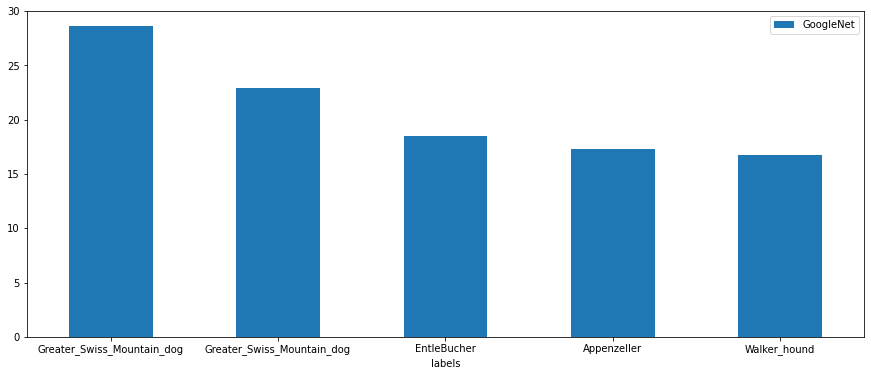

In [ ]:
print('Greater Swiss Mountain Dog class  |  GoogleNet')
for i in range(60, 80):
    print(f"#{i+1}: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")

dog = gn_probs[12:16].flatten()
df = pd.DataFrame(dog, columns = ['GoogleNet'])
dog_label = gn_cls_labels[60:80]
df['labels'] = dog_label
dog_googlenet = df.sort_values(by=['GoogleNet'], ascending=False)
dog5_gn = dog_googlenet.head(5)
ax = dog5_gn.plot.bar(x='labels', y='GoogleNet', rot=0, figsize=(15,6))

Greater Swiss Mountain Dog class  |  ShuffleNet
#61: American_Staffordshire_terrier -- 18.2%
#62: Italian_greyhound -- 7.1%
#63: Appenzeller -- 6.4%
#64: magpie -- 4.5%
#65: drake -- 2.4%
#66: Great_Dane -- 40.1%
#67: English_springer -- 8.8%
#68: Greater_Swiss_Mountain_dog -- 5.0%
#69: Appenzeller -- 4.9%
#70: Walker_hound -- 2.1%
#71: Rhodesian_ridgeback -- 52.3%
#72: vizsla -- 2.7%
#73: Appenzeller -- 2.6%
#74: mud_turtle -- 2.2%
#75: American_Staffordshire_terrier -- 1.9%
#76: Labrador_retriever -- 19.7%
#77: basset -- 7.2%
#78: Walker_hound -- 6.3%
#79: American_Staffordshire_terrier -- 5.1%
#80: beagle -- 4.8%


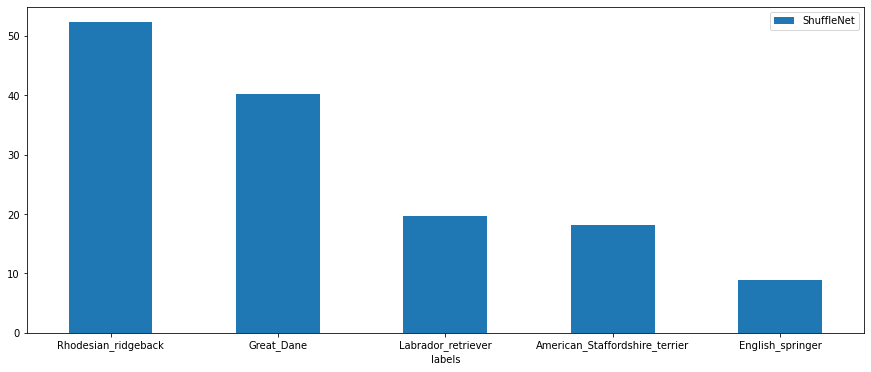

In [ ]:
print('Greater Swiss Mountain Dog class  |  ShuffleNet')
for i in range(60, 80):
    print(f"#{i+1}: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")

dog = sn_probs[12:16].flatten()
df = pd.DataFrame(dog, columns = ['ShuffleNet'])
dog_label = sn_cls_labels[60:80]
df['labels'] = dog_label
dog_shufflenet = df.sort_values(by=['ShuffleNet'], ascending=False)
dog5_sn = dog_shufflenet.head(5)
ax = dog5_sn.plot.bar(x='labels', y='ShuffleNet', rot=0, figsize=(15,6))

Greater Swiss Mountain Dog class  |  DenseNet
#61: Appenzeller -- 50.6%
#62: EntleBucher -- 8.4%
#63: Greater_Swiss_Mountain_dog -- 5.1%
#64: basenji -- 4.5%
#65: boxer -- 4.1%
#66: Great_Dane -- 44.9%
#67: Appenzeller -- 9.5%
#68: Greater_Swiss_Mountain_dog -- 7.3%
#69: EntleBucher -- 6.6%
#70: Walker_hound -- 5.7%
#71: Labrador_retriever -- 11.0%
#72: Greater_Swiss_Mountain_dog -- 10.0%
#73: EntleBucher -- 8.6%
#74: Appenzeller -- 3.6%
#75: Rhodesian_ridgeback -- 2.8%
#76: American_Staffordshire_terrier -- 26.7%
#77: Greater_Swiss_Mountain_dog -- 14.5%
#78: EntleBucher -- 11.0%
#79: Walker_hound -- 8.5%
#80: English_foxhound -- 6.9%


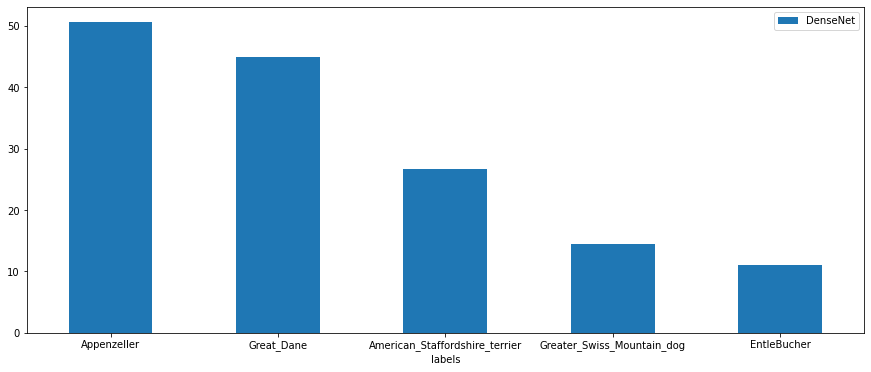

In [ ]:
print('Greater Swiss Mountain Dog class  |  DenseNet')
for i in range(60, 80):
    print(f"#{i+1}: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")

dog = dn_probs[12:16].flatten()
df = pd.DataFrame(dog, columns = ['DenseNet'])
dog_label = dn_cls_labels[60:80]
df['labels'] = dog_label
dog_densenet = df.sort_values(by=['DenseNet'], ascending=False)
dog5_dn = dog_densenet.head(5)
ax = dog5_dn.plot.bar(x='labels', y='DenseNet', rot=0, figsize=(15,6))

Cat class  |  Resnet18
#81: schipperke -- 46.6%
#82: plastic_bag -- 3.5%
#83: Pomeranian -- 2.3%
#84: umbrella -- 2.2%
#85: Siamese_cat -- 1.4%
#86: Persian_cat -- 18.9%
#87: Angora -- 12.8%
#88: Egyptian_cat -- 9.9%
#89: sleeping_bag -- 6.5%
#90: tabby -- 6.0%
#91: Siamese_cat -- 16.6%
#92: Persian_cat -- 4.7%
#93: Egyptian_cat -- 4.3%
#94: plastic_bag -- 3.9%
#95: Chihuahua -- 3.5%
#96: Egyptian_cat -- 26.3%
#97: plastic_bag -- 3.0%
#98: vase -- 2.7%
#99: beaker -- 2.6%
#100: tabby -- 2.4%


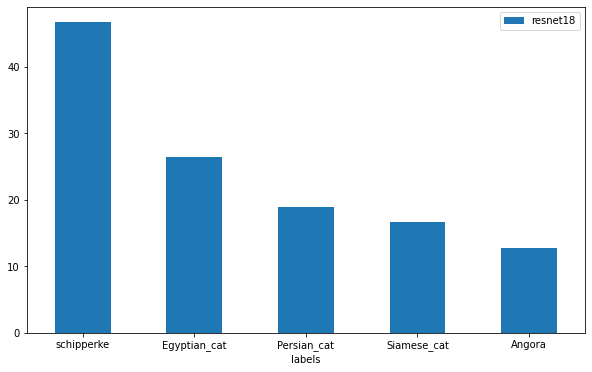

In [ ]:
print('Cat class  |  Resnet18')
for i in range(80, 100):
    print(f"#{i+1}: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
cat = rn_probs[16:20].flatten()
df = pd.DataFrame(cat, columns = ['resnet18'])
cat_label = rn_cls_labels[80:100]
df['labels'] = cat_label
cat_resnet = df.sort_values(by=['resnet18'], ascending=False)
cat5_rn18 = cat_resnet.head(5)
ax = cat5_rn18.plot.bar(x='labels', y='resnet18', rot=0, figsize=(10,6))

Cat class  |  Alexnet
#81: window_screen -- 100.0%
#82: Egyptian_cat -- 0.0%
#83: window_shade -- 0.0%
#84: indri -- 0.0%
#85: howler_monkey -- 0.0%
#86: window_shade -- 100.0%
#87: computer_keyboard -- 0.0%
#88: spotlight -- 0.0%
#89: window_screen -- 0.0%
#90: rule -- 0.0%
#91: spider_monkey -- 97.5%
#92: gibbon -- 2.5%
#93: howler_monkey -- 0.0%
#94: capuchin -- 0.0%
#95: three-toed_sloth -- 0.0%
#96: spotlight -- 100.0%
#97: digital_clock -- 0.0%
#98: lampshade -- 0.0%
#99: rule -- 0.0%
#100: window_screen -- 0.0%


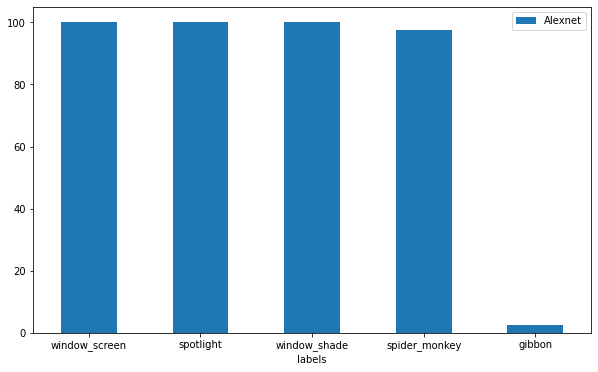

In [ ]:
print('Cat class  |  Alexnet')
for i in range(80, 100):
    print(f"#{i+1}: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")

cat = an_probs[16:20].flatten()
df = pd.DataFrame(cat, columns = ['Alexnet'])
cat_label = an_cls_labels[80:100]
df['labels'] = cat_label
cat_alexnet = df.sort_values(by=['Alexnet'], ascending=False)
cat5_an = cat_alexnet.head(5)
ax = cat5_an.plot.bar(x='labels', y='Alexnet', rot=0, figsize=(10,6))

Cat class  |  GoogleNet
#81: Persian_cat -- 22.4%
#82: groenendael -- 7.8%
#83: schipperke -- 5.2%
#84: Pomeranian -- 4.5%
#85: affenpinscher -- 3.0%
#86: Egyptian_cat -- 14.1%
#87: Persian_cat -- 5.9%
#88: tabby -- 4.7%
#89: Siamese_cat -- 3.7%
#90: hamster -- 1.5%
#91: Siamese_cat -- 12.1%
#92: Egyptian_cat -- 11.8%
#93: plastic_bag -- 4.7%
#94: tabby -- 2.5%
#95: Persian_cat -- 1.1%
#96: Egyptian_cat -- 24.4%
#97: lynx -- 10.9%
#98: tabby -- 3.9%
#99: Persian_cat -- 2.4%
#100: tiger_cat -- 2.4%


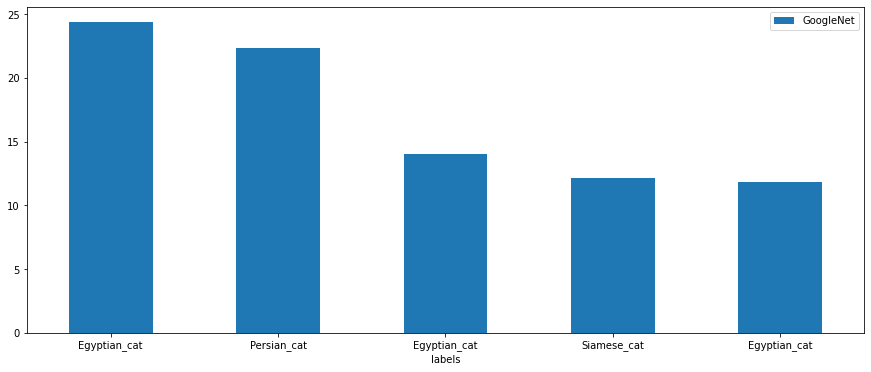

In [ ]:
print('Cat class  |  GoogleNet')
for i in range(80, 100):
    print(f"#{i+1}: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")

cat = gn_probs[16:20].flatten()
df = pd.DataFrame(cat, columns = ['GoogleNet'])
cat_label = gn_cls_labels[80:100]
df['labels'] = cat_label
cat_googlenet = df.sort_values(by=['GoogleNet'], ascending=False)
cat5_gn = cat_googlenet.head(5)
ax = cat5_gn.plot.bar(x='labels', y='GoogleNet', rot=0, figsize=(15,6))

Cat class  |  ShuffleNet
#81: schipperke -- 23.2%
#82: miniature_pinscher -- 13.9%
#83: beer_bottle -- 4.2%
#84: orangutan -- 3.9%
#85: spider_monkey -- 2.7%
#86: Egyptian_cat -- 11.4%
#87: Persian_cat -- 9.7%
#88: tabby -- 6.5%
#89: plastic_bag -- 4.9%
#90: Angora -- 4.0%
#91: mask -- 17.2%
#92: ski_mask -- 11.7%
#93: Egyptian_cat -- 5.4%
#94: teddy -- 4.0%
#95: pillow -- 3.9%
#96: lynx -- 37.0%
#97: Egyptian_cat -- 34.3%
#98: kit_fox -- 7.8%
#99: bow_tie -- 1.7%
#100: tabby -- 1.4%


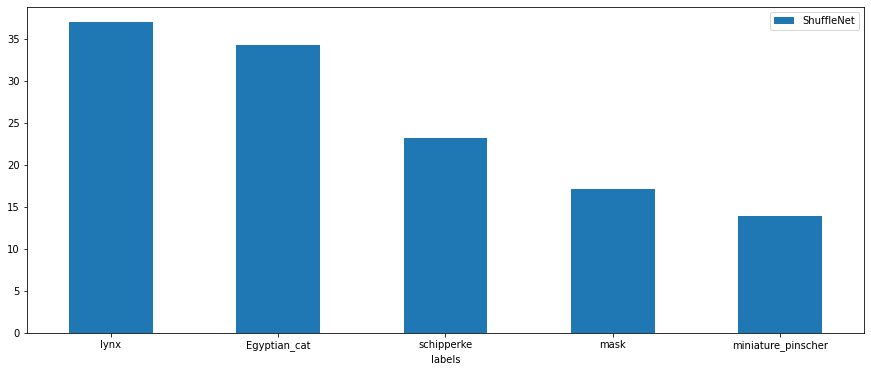

In [ ]:
print('Cat class  |  ShuffleNet')
for i in range(80, 100):
    print(f"#{i+1}: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")

cat = sn_probs[16:20].flatten()
df = pd.DataFrame(cat, columns = ['ShuffleNet'])
cat_label = sn_cls_labels[80:100]
df['labels'] = cat_label
cat_shufflenet = df.sort_values(by=['ShuffleNet'], ascending=False)
cat5_sn = cat_shufflenet.head(5)
ax = cat5_sn.plot.bar(x='labels', y='ShuffleNet', rot=0, figsize=(15,6))

Cat class  |  DenseNet
#81: schipperke -- 93.9%
#82: Pomeranian -- 0.5%
#83: Siamese_cat -- 0.5%
#84: carton -- 0.5%
#85: space_heater -- 0.3%
#86: Egyptian_cat -- 55.9%
#87: Siamese_cat -- 8.0%
#88: tabby -- 5.1%
#89: tiger_cat -- 2.1%
#90: lynx -- 1.7%
#91: Siamese_cat -- 26.7%
#92: Egyptian_cat -- 17.9%
#93: hamper -- 3.6%
#94: plastic_bag -- 3.5%
#95: shower_cap -- 3.4%
#96: Egyptian_cat -- 52.0%
#97: tiger_cat -- 9.3%
#98: tabby -- 4.8%
#99: safety_pin -- 3.4%
#100: lynx -- 2.8%


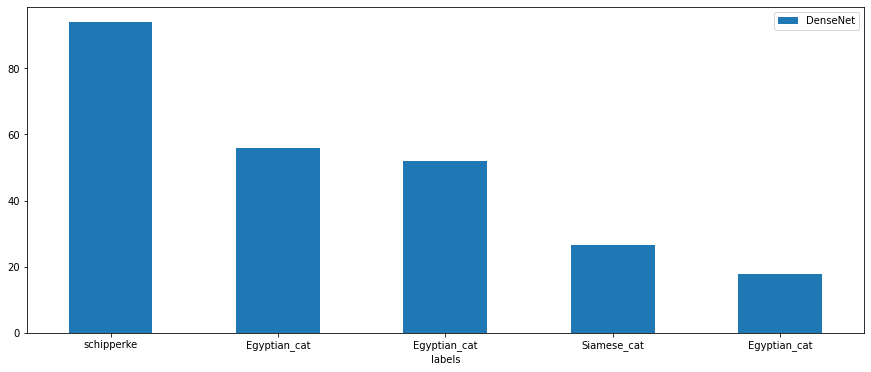

In [ ]:
print('Cat class  |  DenseNet')
for i in range(80, 100):
    print(f"#{i+1}: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")

cat = dn_probs[16:20].flatten()
df = pd.DataFrame(cat, columns = ['DenseNet'])
cat_label = dn_cls_labels[80:100]
df['labels'] = cat_label
cat_densenet = df.sort_values(by=['DenseNet'], ascending=False)
cat5_dn = cat_densenet.head(5)
ax = cat5_dn.plot.bar(x='labels', y='DenseNet', rot=0, figsize=(15,6))

Lets see the top 5 prediction or each image 

 Top #1 prediction of Resnet18: hard_disc -- 5.6%
 Top #2 prediction of Resnet18: scale -- 4.1%
 Top #3 prediction of Resnet18: racket -- 3.7%
 Top #4 prediction of Resnet18: spotlight -- 2.8%
 Top #5 prediction of Resnet18: modem -- 2.3%
 Top#1 prediction of Alexnet: tennis_ball -- 100.0%
 Top#2 prediction of Alexnet: racket -- 0.0%
 Top#3 prediction of Alexnet: shopping_cart -- 0.0%
 Top#4 prediction of Alexnet: microphone -- 0.0%
 Top#5 prediction of Alexnet: spotlight -- 0.0%
 Top#1 prediction of GoogleNet: racket -- 4.2%
 Top#2 prediction of GoogleNet: magnetic_compass -- 3.8%
 Top#3 prediction of GoogleNet: stopwatch -- 3.7%
 Top#4 prediction of GoogleNet: spotlight -- 3.0%
 Top#5 prediction of GoogleNet: microphone -- 2.5%
 Top#1 prediction of ShuffleNet: scale -- 24.4%
 Top#2 prediction of ShuffleNet: spotlight -- 7.7%
 Top#3 prediction of ShuffleNet: racket -- 6.4%
 Top#4 prediction of ShuffleNet: cellular_telephone -- 4.2%
 Top#5 prediction of ShuffleNet: pedestal -- 2.1%
 To

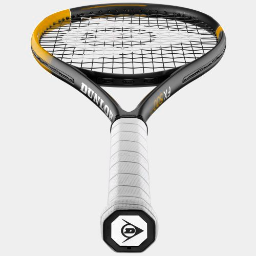

In [17]:
for i in range(5):
    print(f" Top #{i+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(5): 
    print(f" Top#{i+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(5): 
    print(f" Top#{i+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(5): 
    print(f" Top#{i+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(5): 
    print(f" Top#{i+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
racket1 = dataset[0][0].cpu().numpy()
Image.fromarray(np.rollaxis(racket1, 0,3))

 Top#1 prediction of Resnet18: racket -- 77.0%
 Top#2 prediction of Resnet18: tennis_ball -- 2.0%
 Top#3 prediction of Resnet18: maraca -- 1.3%
 Top#4 prediction of Resnet18: wine_bottle -- 1.2%
 Top#5 prediction of Resnet18: scale -- 0.6%
 Top#1 prediction of Alexnet: table_lamp -- 97.1%
 Top#2 prediction of Alexnet: tennis_ball -- 2.9%
 Top#3 prediction of Alexnet: window_screen -- 0.0%
 Top#4 prediction of Alexnet: rocking_chair -- 0.0%
 Top#5 prediction of Alexnet: racket -- 0.0%
 Top#1 prediction of GoogleNet: racket -- 43.7%
 Top#2 prediction of GoogleNet: electric_fan -- 7.4%
 Top#3 prediction of GoogleNet: tennis_ball -- 1.2%
 Top#4 prediction of GoogleNet: strainer -- 1.0%
 Top#5 prediction of GoogleNet: stethoscope -- 0.8%
 Top#1 prediction of ShuffleNet: racket -- 79.6%
 Top#2 prediction of ShuffleNet: broom -- 1.4%
 Top#3 prediction of ShuffleNet: crossword_puzzle -- 1.4%
 Top#4 prediction of ShuffleNet: swab -- 0.6%
 Top#5 prediction of ShuffleNet: pick -- 0.6%
 Top#1 pred

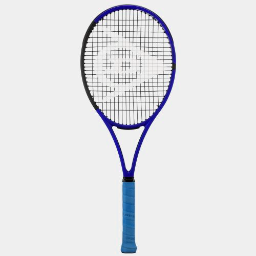

In [30]:
for i in range(5,10):
    print(f" Top#{(i-5)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(5,10): 
    print(f" Top#{(i-5)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(5,10): 
    print(f" Top#{(i-5)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(5,10): 
    print(f" Top#{(i-5)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(5,10): 
    print(f" Top#{(i-5)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
racket2 = dataset[1][0].cpu().numpy()
Image.fromarray(np.rollaxis(racket2, 0,3))

 Top#1 prediction of Resnet18: racket -- 80.6%
 Top#2 prediction of Resnet18: tennis_ball -- 6.1%
 Top#3 prediction of Resnet18: croquet_ball -- 1.4%
 Top#4 prediction of Resnet18: bow -- 0.9%
 Top#5 prediction of Resnet18: golf_ball -- 0.9%
 Top#1 prediction of Alexnet: racket -- 100.0%
 Top#2 prediction of Alexnet: great_white_shark -- 0.0%
 Top#3 prediction of Alexnet: tench -- 0.0%
 Top#4 prediction of Alexnet: tiger_shark -- 0.0%
 Top#5 prediction of Alexnet: goldfish -- 0.0%
 Top#1 prediction of GoogleNet: racket -- 74.9%
 Top#2 prediction of GoogleNet: stethoscope -- 1.2%
 Top#3 prediction of GoogleNet: strainer -- 0.7%
 Top#4 prediction of GoogleNet: magnetic_compass -- 0.6%
 Top#5 prediction of GoogleNet: bolo_tie -- 0.6%
 Top#1 prediction of ShuffleNet: racket -- 67.3%
 Top#2 prediction of ShuffleNet: shovel -- 4.6%
 Top#3 prediction of ShuffleNet: walking_stick -- 2.8%
 Top#4 prediction of ShuffleNet: trilobite -- 0.9%
 Top#5 prediction of ShuffleNet: chainlink_fence -- 0.9%

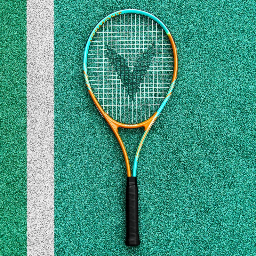

In [32]:
for i in range(10,15):
    print(f" Top#{(i-10)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(10,15): 
    print(f" Top#{(i-10)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(10,15): 
    print(f" Top#{(i-10)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(10,15): 
    print(f" Top#{(i-10)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(10,15): 
    print(f" Top#{(i-10)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
racket3 = dataset[2][0].cpu().numpy()
Image.fromarray(np.rollaxis(racket3, 0,3))

 Top#1 prediction of Resnet18: racket -- 29.5%
 Top#2 prediction of Resnet18: strainer -- 8.1%
 Top#3 prediction of Resnet18: fire_screen -- 6.7%
 Top#4 prediction of Resnet18: loupe -- 6.3%
 Top#5 prediction of Resnet18: electric_fan -- 3.4%
 Top#1 prediction of Alexnet: shopping_basket -- 99.7%
 Top#2 prediction of Alexnet: fire_screen -- 0.3%
 Top#3 prediction of Alexnet: window_screen -- 0.1%
 Top#4 prediction of Alexnet: racket -- 0.0%
 Top#5 prediction of Alexnet: tennis_ball -- 0.0%
 Top#1 prediction of GoogleNet: racket -- 13.9%
 Top#2 prediction of GoogleNet: sunglass -- 7.9%
 Top#3 prediction of GoogleNet: sunglasses -- 3.4%
 Top#4 prediction of GoogleNet: spotlight -- 1.8%
 Top#5 prediction of GoogleNet: strainer -- 1.7%
 Top#1 prediction of ShuffleNet: racket -- 97.4%
 Top#2 prediction of ShuffleNet: spotlight -- 0.2%
 Top#3 prediction of ShuffleNet: bow -- 0.2%
 Top#4 prediction of ShuffleNet: bannister -- 0.1%
 Top#5 prediction of ShuffleNet: electric_fan -- 0.1%
 Top#1 p

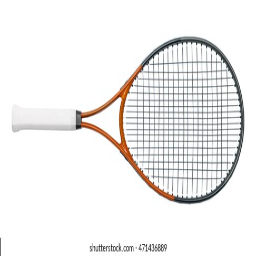

In [33]:
for i in range(15,20):
    print(f" Top#{(i-15)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(15,20): 
    print(f" Top#{(i-15)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(15,20): 
    print(f" Top#{(i-15)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(15,20): 
    print(f" Top#{(i-15)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(15,20): 
    print(f" Top#{(i-15)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
racket4 = dataset[3][0].cpu().numpy()
Image.fromarray(np.rollaxis(racket4, 0,3))

 Top#1 prediction of Resnet18: sea_cucumber -- 13.5%
 Top#2 prediction of Resnet18: otter -- 7.9%
 Top#3 prediction of Resnet18: brown_bear -- 7.0%
 Top#4 prediction of Resnet18: boa_constrictor -- 5.6%
 Top#5 prediction of Resnet18: tick -- 2.3%
 Top#1 prediction of Alexnet: window_screen -- 99.9%
 Top#2 prediction of Alexnet: honeycomb -- 0.0%
 Top#3 prediction of Alexnet: window_shade -- 0.0%
 Top#4 prediction of Alexnet: spotlight -- 0.0%
 Top#5 prediction of Alexnet: lampshade -- 0.0%
 Top#1 prediction of GoogleNet: sea_lion -- 3.0%
 Top#2 prediction of GoogleNet: loggerhead -- 2.7%
 Top#3 prediction of GoogleNet: boa_constrictor -- 2.3%
 Top#4 prediction of GoogleNet: otter -- 1.9%
 Top#5 prediction of GoogleNet: hare -- 1.8%
 Top#1 prediction of ShuffleNet: sea_cucumber -- 22.8%
 Top#2 prediction of ShuffleNet: English_springer -- 7.7%
 Top#3 prediction of ShuffleNet: coral_reef -- 3.0%
 Top#4 prediction of ShuffleNet: teddy -- 1.5%
 Top#5 prediction of ShuffleNet: brown_bear --

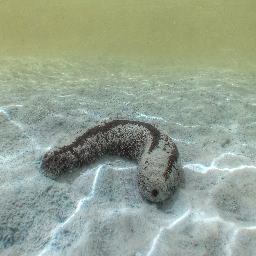

In [34]:
for i in range(20,25):
    print(f" Top#{(i-20)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(20,25): 
    print(f" Top#{(i-20)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(20,25): 
    print(f" Top#{(i-20)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(20,25): 
    print(f" Top#{(i-20)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(20,25): 
    print(f" Top#{(i-20)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
sea1 = dataset[4][0].cpu().numpy()
Image.fromarray(np.rollaxis(sea1, 0,3))

 Top#1 prediction of Resnet18: dough -- 14.1%
 Top#2 prediction of Resnet18: banana -- 6.2%
 Top#3 prediction of Resnet18: clog -- 5.0%
 Top#4 prediction of Resnet18: sea_cucumber -- 4.1%
 Top#5 prediction of Resnet18: bolete -- 4.0%
 Top#1 prediction of Alexnet: spotlight -- 100.0%
 Top#2 prediction of Alexnet: digital_clock -- 0.0%
 Top#3 prediction of Alexnet: monitor -- 0.0%
 Top#4 prediction of Alexnet: steel_arch_bridge -- 0.0%
 Top#5 prediction of Alexnet: dome -- 0.0%
 Top#1 prediction of GoogleNet: eel -- 33.4%
 Top#2 prediction of GoogleNet: sea_cucumber -- 6.3%
 Top#3 prediction of GoogleNet: banana -- 5.3%
 Top#4 prediction of GoogleNet: slug -- 1.8%
 Top#5 prediction of GoogleNet: mortar -- 1.7%
 Top#1 prediction of ShuffleNet: wombat -- 15.5%
 Top#2 prediction of ShuffleNet: sea_cucumber -- 10.4%
 Top#3 prediction of ShuffleNet: bucket -- 6.3%
 Top#4 prediction of ShuffleNet: dugong -- 6.1%
 Top#5 prediction of ShuffleNet: hay -- 5.6%
 Top#1 prediction of DenseNet: sea_cu

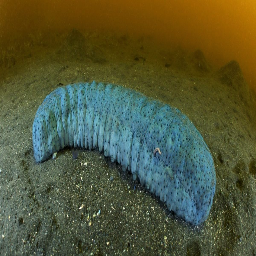

In [35]:
for i in range(25,30):
    print(f" Top#{(i-25)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(25,30): 
    print(f" Top#{(i-25)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(25,30): 
    print(f" Top#{(i-25)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(25,30): 
    print(f" Top#{(i-25)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(25,30): 
    print(f" Top#{(i-25)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
sea2 = dataset[5][0].cpu().numpy()
Image.fromarray(np.rollaxis(sea2, 0,3))

 Top#1 prediction of Resnet18: sea_cucumber -- 30.5%
 Top#2 prediction of Resnet18: hermit_crab -- 13.6%
 Top#3 prediction of Resnet18: chocolate_sauce -- 10.4%
 Top#4 prediction of Resnet18: meat_loaf -- 7.0%
 Top#5 prediction of Resnet18: isopod -- 4.5%
 Top#1 prediction of Alexnet: digital_clock -- 97.2%
 Top#2 prediction of Alexnet: traffic_light -- 2.8%
 Top#3 prediction of Alexnet: screen -- 0.0%
 Top#4 prediction of Alexnet: chainlink_fence -- 0.0%
 Top#5 prediction of Alexnet: window_screen -- 0.0%
 Top#1 prediction of GoogleNet: gyromitra -- 15.9%
 Top#2 prediction of GoogleNet: sea_cucumber -- 5.6%
 Top#3 prediction of GoogleNet: ostrich -- 4.8%
 Top#4 prediction of GoogleNet: oystercatcher -- 3.4%
 Top#5 prediction of GoogleNet: hen -- 3.0%
 Top#1 prediction of ShuffleNet: chocolate_sauce -- 48.0%
 Top#2 prediction of ShuffleNet: rock_python -- 3.1%
 Top#3 prediction of ShuffleNet: stinkhorn -- 2.6%
 Top#4 prediction of ShuffleNet: gyromitra -- 2.6%
 Top#5 prediction of Shuf

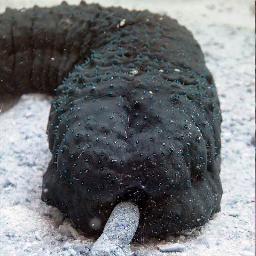

In [36]:
for i in range(30,35):
    print(f" Top#{(i-30)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(30,35): 
    print(f" Top#{(i-30)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(30,35): 
    print(f" Top#{(i-30)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(30,35): 
    print(f" Top#{(i-30)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(30,35): 
    print(f" Top#{(i-30)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
sea3 = dataset[6][0].cpu().numpy()
Image.fromarray(np.rollaxis(sea3, 0,3))

 Top#1 prediction of Resnet18: flatworm -- 25.9%
 Top#2 prediction of Resnet18: sea_cucumber -- 18.4%
 Top#3 prediction of Resnet18: eel -- 15.8%
 Top#4 prediction of Resnet18: puffer -- 7.6%
 Top#5 prediction of Resnet18: sea_anemone -- 7.5%
 Top#1 prediction of Alexnet: window_screen -- 98.0%
 Top#2 prediction of Alexnet: digital_clock -- 2.0%
 Top#3 prediction of Alexnet: scoreboard -- 0.0%
 Top#4 prediction of Alexnet: screen -- 0.0%
 Top#5 prediction of Alexnet: obelisk -- 0.0%
 Top#1 prediction of GoogleNet: sea_cucumber -- 19.9%
 Top#2 prediction of GoogleNet: spiny_lobster -- 12.7%
 Top#3 prediction of GoogleNet: starfish -- 6.5%
 Top#4 prediction of GoogleNet: chiton -- 5.9%
 Top#5 prediction of GoogleNet: flatworm -- 5.6%
 Top#1 prediction of ShuffleNet: bison -- 41.8%
 Top#2 prediction of ShuffleNet: sea_cucumber -- 18.0%
 Top#3 prediction of ShuffleNet: confectionery -- 7.5%
 Top#4 prediction of ShuffleNet: anemone_fish -- 5.9%
 Top#5 prediction of ShuffleNet: sea_anemone -

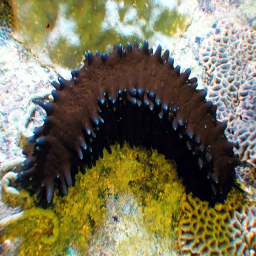

In [38]:
for i in range(35,40):
    print(f" Top#{(i-35)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(35,40): 
    print(f" Top#{(i-35)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(35,40): 
    print(f" Top#{(i-35)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(35,40): 
    print(f" Top#{(i-35)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(35,40): 
    print(f" Top#{(i-35)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
sea4 = dataset[7][0].cpu().numpy()
Image.fromarray(np.rollaxis(sea4, 0,3))

 Top#1 prediction of Resnet18: banded_gecko -- 18.8%
 Top#2 prediction of Resnet18: African_chameleon -- 11.4%
 Top#3 prediction of Resnet18: tailed_frog -- 7.2%
 Top#4 prediction of Resnet18: letter_opener -- 6.3%
 Top#5 prediction of Resnet18: alligator_lizard -- 5.6%
 Top#1 prediction of Alexnet: digital_clock -- 100.0%
 Top#2 prediction of Alexnet: oscilloscope -- 0.0%
 Top#3 prediction of Alexnet: screen -- 0.0%
 Top#4 prediction of Alexnet: spotlight -- 0.0%
 Top#5 prediction of Alexnet: nematode -- 0.0%
 Top#1 prediction of GoogleNet: banded_gecko -- 7.0%
 Top#2 prediction of GoogleNet: agama -- 2.7%
 Top#3 prediction of GoogleNet: alligator_lizard -- 2.3%
 Top#4 prediction of GoogleNet: whiptail -- 2.2%
 Top#5 prediction of GoogleNet: African_chameleon -- 1.5%
 Top#1 prediction of ShuffleNet: ocarina -- 26.6%
 Top#2 prediction of ShuffleNet: scorpion -- 14.1%
 Top#3 prediction of ShuffleNet: American_lobster -- 6.1%
 Top#4 prediction of ShuffleNet: frilled_lizard -- 3.2%
 Top#5

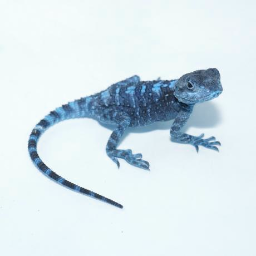

In [40]:
for i in range(40,45):
    print(f" Top#{(i-40)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(40,45): 
    print(f" Top#{(i-40)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(40,45): 
    print(f" Top#{(i-40)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(40,45): 
    print(f" Top#{(i-40)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(40,45): 
    print(f" Top#{(i-40)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
agama1 = dataset[8][0].cpu().numpy()
Image.fromarray(np.rollaxis(agama1, 0,3))

 Top#1 prediction of Resnet18: fiddler_crab -- 62.1%
 Top#2 prediction of Resnet18: rock_crab -- 10.7%
 Top#3 prediction of Resnet18: starfish -- 10.6%
 Top#4 prediction of Resnet18: hermit_crab -- 3.5%
 Top#5 prediction of Resnet18: conch -- 1.0%
 Top#1 prediction of Alexnet: bubble -- 99.6%
 Top#2 prediction of Alexnet: loudspeaker -- 0.3%
 Top#3 prediction of Alexnet: radio_telescope -- 0.1%
 Top#4 prediction of Alexnet: picket_fence -- 0.1%
 Top#5 prediction of Alexnet: spider_web -- 0.0%
 Top#1 prediction of GoogleNet: fiddler_crab -- 14.1%
 Top#2 prediction of GoogleNet: rock_crab -- 7.3%
 Top#3 prediction of GoogleNet: frilled_lizard -- 4.8%
 Top#4 prediction of GoogleNet: hermit_crab -- 2.7%
 Top#5 prediction of GoogleNet: triceratops -- 2.4%
 Top#1 prediction of ShuffleNet: frilled_lizard -- 14.9%
 Top#2 prediction of ShuffleNet: pelican -- 8.4%
 Top#3 prediction of ShuffleNet: birdhouse -- 5.0%
 Top#4 prediction of ShuffleNet: red_wolf -- 3.4%
 Top#5 prediction of ShuffleNet:

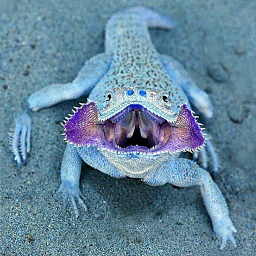

In [42]:
for i in range(45,50):
    print(f" Top#{(i-45)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(45,50): 
    print(f" Top#{(i-45)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(45,50): 
    print(f" Top#{(i-45)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(45,50): 
    print(f" Top#{(i-45)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(45,50): 
    print(f" Top#{(i-45)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
agama2 = dataset[9][0].cpu().numpy()
Image.fromarray(np.rollaxis(agama2, 0,3))

 Top#1 prediction of Resnet18: common_newt -- 16.0%
 Top#2 prediction of Resnet18: whiptail -- 15.4%
 Top#3 prediction of Resnet18: American_alligator -- 10.1%
 Top#4 prediction of Resnet18: axolotl -- 7.7%
 Top#5 prediction of Resnet18: agama -- 7.0%
 Top#1 prediction of Alexnet: spotlight -- 100.0%
 Top#2 prediction of Alexnet: nematode -- 0.0%
 Top#3 prediction of Alexnet: pole -- 0.0%
 Top#4 prediction of Alexnet: obelisk -- 0.0%
 Top#5 prediction of Alexnet: digital_clock -- 0.0%
 Top#1 prediction of GoogleNet: American_chameleon -- 12.7%
 Top#2 prediction of GoogleNet: green_lizard -- 8.9%
 Top#3 prediction of GoogleNet: whiptail -- 5.8%
 Top#4 prediction of GoogleNet: agama -- 5.8%
 Top#5 prediction of GoogleNet: axolotl -- 4.7%
 Top#1 prediction of ShuffleNet: whiptail -- 9.6%
 Top#2 prediction of ShuffleNet: American_alligator -- 8.8%
 Top#3 prediction of ShuffleNet: American_chameleon -- 7.4%
 Top#4 prediction of ShuffleNet: agama -- 6.8%
 Top#5 prediction of ShuffleNet: band

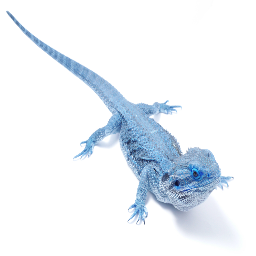

In [44]:
for i in range(50,55):
    print(f" Top#{(i-50)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(50,55): 
    print(f" Top#{(i-50)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(50,55): 
    print(f" Top#{(i-50)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(50,55): 
    print(f" Top#{(i-50)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(50,55): 
    print(f" Top#{(i-50)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
agama3 = dataset[10][0].cpu().numpy()
Image.fromarray(np.rollaxis(agama3, 0,3))

 Top#1 prediction of Resnet18: agama -- 50.8%
 Top#2 prediction of Resnet18: water_snake -- 11.4%
 Top#3 prediction of Resnet18: ringneck_snake -- 7.9%
 Top#4 prediction of Resnet18: alligator_lizard -- 6.5%
 Top#5 prediction of Resnet18: garter_snake -- 3.5%
 Top#1 prediction of Alexnet: maypole -- 91.8%
 Top#2 prediction of Alexnet: chain -- 5.6%
 Top#3 prediction of Alexnet: honeycomb -- 1.6%
 Top#4 prediction of Alexnet: shovel -- 1.0%
 Top#5 prediction of Alexnet: umbrella -- 0.0%
 Top#1 prediction of GoogleNet: agama -- 51.9%
 Top#2 prediction of GoogleNet: green_mamba -- 12.6%
 Top#3 prediction of GoogleNet: African_chameleon -- 1.7%
 Top#4 prediction of GoogleNet: whiptail -- 1.6%
 Top#5 prediction of GoogleNet: vine_snake -- 1.6%
 Top#1 prediction of ShuffleNet: agama -- 67.8%
 Top#2 prediction of ShuffleNet: ringneck_snake -- 4.3%
 Top#3 prediction of ShuffleNet: European_fire_salamander -- 1.8%
 Top#4 prediction of ShuffleNet: garter_snake -- 1.7%
 Top#5 prediction of Shuffl

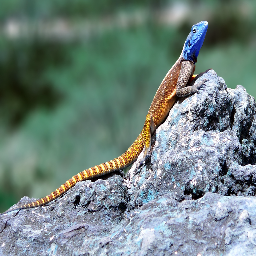

In [45]:
for i in range(55,60):
    print(f" Top#{(i-55)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(55,60): 
    print(f" Top#{(i-55)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(55,60): 
    print(f" Top#{(i-55)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(55,60): 
    print(f" Top#{(i-55)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(55,60): 
    print(f" Top#{(i-55)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
agama4 = dataset[11][0].cpu().numpy()
Image.fromarray(np.rollaxis(agama4, 0,3))

 Top#1 prediction of Resnet18: Appenzeller -- 24.2%
 Top#2 prediction of Resnet18: EntleBucher -- 16.1%
 Top#3 prediction of Resnet18: Greater_Swiss_Mountain_dog -- 13.4%
 Top#4 prediction of Resnet18: Boston_bull -- 4.8%
 Top#5 prediction of Resnet18: American_Staffordshire_terrier -- 4.3%
 Top#1 prediction of Alexnet: traffic_light -- 97.7%
 Top#2 prediction of Alexnet: Bernese_mountain_dog -- 2.3%
 Top#3 prediction of Alexnet: beagle -- 0.1%
 Top#4 prediction of Alexnet: Appenzeller -- 0.0%
 Top#5 prediction of Alexnet: boxer -- 0.0%
 Top#1 prediction of GoogleNet: Appenzeller -- 15.8%
 Top#2 prediction of GoogleNet: EntleBucher -- 6.7%
 Top#3 prediction of GoogleNet: Staffordshire_bullterrier -- 4.9%
 Top#4 prediction of GoogleNet: American_Staffordshire_terrier -- 4.9%
 Top#5 prediction of GoogleNet: whippet -- 3.4%
 Top#1 prediction of ShuffleNet: American_Staffordshire_terrier -- 18.2%
 Top#2 prediction of ShuffleNet: Italian_greyhound -- 7.1%
 Top#3 prediction of ShuffleNet: Ap

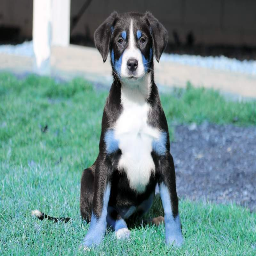

In [46]:
for i in range(60,65):
    print(f" Top#{(i-60)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(60,65): 
    print(f" Top#{(i-60)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(60,65): 
    print(f" Top#{(i-60)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(60,65): 
    print(f" Top#{(i-60)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(60,65): 
    print(f" Top#{(i-60)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
dog1 = dataset[12][0].cpu().numpy()
Image.fromarray(np.rollaxis(dog1, 0,3))

 Top#1 prediction of Resnet18: Saint_Bernard -- 25.4%
 Top#2 prediction of Resnet18: Great_Dane -- 13.3%
 Top#3 prediction of Resnet18: Boston_bull -- 7.9%
 Top#4 prediction of Resnet18: English_springer -- 7.1%
 Top#5 prediction of Resnet18: Greater_Swiss_Mountain_dog -- 6.8%
 Top#1 prediction of Alexnet: hook -- 100.0%
 Top#2 prediction of Alexnet: hourglass -- 0.0%
 Top#3 prediction of Alexnet: chain -- 0.0%
 Top#4 prediction of Alexnet: dial_telephone -- 0.0%
 Top#5 prediction of Alexnet: corkscrew -- 0.0%
 Top#1 prediction of GoogleNet: Greater_Swiss_Mountain_dog -- 14.0%
 Top#2 prediction of GoogleNet: Great_Dane -- 8.6%
 Top#3 prediction of GoogleNet: EntleBucher -- 8.4%
 Top#4 prediction of GoogleNet: Appenzeller -- 6.8%
 Top#5 prediction of GoogleNet: Walker_hound -- 5.8%
 Top#1 prediction of ShuffleNet: Great_Dane -- 40.1%
 Top#2 prediction of ShuffleNet: English_springer -- 8.8%
 Top#3 prediction of ShuffleNet: Greater_Swiss_Mountain_dog -- 5.0%
 Top#4 prediction of ShuffleN

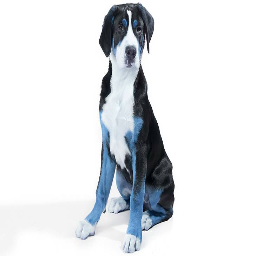

In [65]:
for i in range(65,70):
    print(f" Top#{(i-65)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(65,70): 
    print(f" Top#{(i-65)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(65,70): 
    print(f" Top#{(i-65)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(65,70): 
    print(f" Top#{(i-65)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(65,70): 
    print(f" Top#{(i-65)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
dog2 = dataset[13][0].cpu().numpy()
Image.fromarray(np.rollaxis(dog2, 0,3))

 Top#1 prediction of Resnet18: Greater_Swiss_Mountain_dog -- 11.9%
 Top#2 prediction of Resnet18: Rhodesian_ridgeback -- 11.5%
 Top#3 prediction of Resnet18: Labrador_retriever -- 6.0%
 Top#4 prediction of Resnet18: vizsla -- 5.1%
 Top#5 prediction of Resnet18: Appenzeller -- 4.4%
 Top#1 prediction of Alexnet: Bernese_mountain_dog -- 100.0%
 Top#2 prediction of Alexnet: Greater_Swiss_Mountain_dog -- 0.0%
 Top#3 prediction of Alexnet: Border_collie -- 0.0%
 Top#4 prediction of Alexnet: lighter -- 0.0%
 Top#5 prediction of Alexnet: candle -- 0.0%
 Top#1 prediction of GoogleNet: American_Staffordshire_terrier -- 3.2%
 Top#2 prediction of GoogleNet: beagle -- 2.5%
 Top#3 prediction of GoogleNet: Greater_Swiss_Mountain_dog -- 2.3%
 Top#4 prediction of GoogleNet: Brittany_spaniel -- 1.8%
 Top#5 prediction of GoogleNet: EntleBucher -- 1.3%
 Top#1 prediction of ShuffleNet: Rhodesian_ridgeback -- 52.3%
 Top#2 prediction of ShuffleNet: vizsla -- 2.7%
 Top#3 prediction of ShuffleNet: Appenzeller 

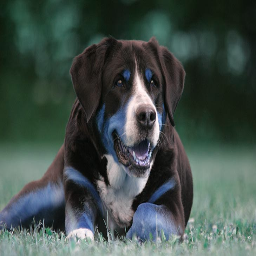

In [66]:
for i in range(70,75):
    print(f" Top#{(i-70)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(70,75): 
    print(f" Top#{(i-70)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(70,75): 
    print(f" Top#{(i-70)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(70,75): 
    print(f" Top#{(i-70)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(70,75): 
    print(f" Top#{(i-70)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
dog3 = dataset[14][0].cpu().numpy()
Image.fromarray(np.rollaxis(dog3, 0,3))

 Top#1 prediction of Resnet18: Walker_hound -- 40.4%
 Top#2 prediction of Resnet18: English_foxhound -- 13.3%
 Top#3 prediction of Resnet18: Labrador_retriever -- 3.7%
 Top#4 prediction of Resnet18: Greater_Swiss_Mountain_dog -- 3.5%
 Top#5 prediction of Resnet18: Rhodesian_ridgeback -- 3.2%
 Top#1 prediction of Alexnet: Appenzeller -- 65.1%
 Top#2 prediction of Alexnet: Greater_Swiss_Mountain_dog -- 34.8%
 Top#3 prediction of Alexnet: boxer -- 0.1%
 Top#4 prediction of Alexnet: Bernese_mountain_dog -- 0.0%
 Top#5 prediction of Alexnet: EntleBucher -- 0.0%
 Top#1 prediction of GoogleNet: EntleBucher -- 26.7%
 Top#2 prediction of GoogleNet: Greater_Swiss_Mountain_dog -- 17.7%
 Top#3 prediction of GoogleNet: Appenzeller -- 13.3%
 Top#4 prediction of GoogleNet: Walker_hound -- 9.1%
 Top#5 prediction of GoogleNet: English_foxhound -- 3.4%
 Top#1 prediction of ShuffleNet: Labrador_retriever -- 19.7%
 Top#2 prediction of ShuffleNet: basset -- 7.2%
 Top#3 prediction of ShuffleNet: Walker_houn

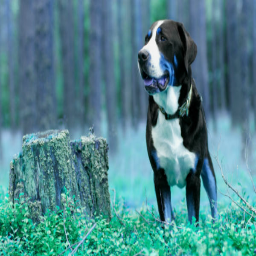

In [68]:
for i in range(75,80):
    print(f" Top#{(i-75)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(75,80): 
    print(f" Top#{(i-75)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(75,80): 
    print(f" Top#{(i-75)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(75,80): 
    print(f" Top#{(i-75)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(75,80): 
    print(f" Top#{(i-75)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
dog4 = dataset[15][0].cpu().numpy()
Image.fromarray(np.rollaxis(dog4, 0,3))

 Top#1 prediction of Resnet18: schipperke -- 46.6%
 Top#2 prediction of Resnet18: plastic_bag -- 3.5%
 Top#3 prediction of Resnet18: Pomeranian -- 2.3%
 Top#4 prediction of Resnet18: umbrella -- 2.2%
 Top#5 prediction of Resnet18: Siamese_cat -- 1.4%
 Top#1 prediction of Alexnet: window_screen -- 99.2%
 Top#2 prediction of Alexnet: Siamese_cat -- 0.8%
 Top#3 prediction of Alexnet: spotlight -- 0.0%
 Top#4 prediction of Alexnet: Egyptian_cat -- 0.0%
 Top#5 prediction of Alexnet: window_shade -- 0.0%
 Top#1 prediction of GoogleNet: Persian_cat -- 22.5%
 Top#2 prediction of GoogleNet: schipperke -- 3.9%
 Top#3 prediction of GoogleNet: Pomeranian -- 3.3%
 Top#4 prediction of GoogleNet: groenendael -- 2.9%
 Top#5 prediction of GoogleNet: howler_monkey -- 2.7%
 Top#1 prediction of ShuffleNet: schipperke -- 23.2%
 Top#2 prediction of ShuffleNet: miniature_pinscher -- 13.9%
 Top#3 prediction of ShuffleNet: beer_bottle -- 4.2%
 Top#4 prediction of ShuffleNet: orangutan -- 3.9%
 Top#5 prediction

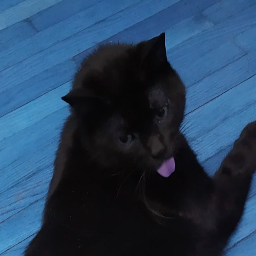

In [69]:
for i in range(80,85):
    print(f" Top#{(i-80)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(80,85): 
    print(f" Top#{(i-80)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(80,85): 
    print(f" Top#{(i-80)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(80,85): 
    print(f" Top#{(i-80)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(80,85): 
    print(f" Top#{(i-80)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
cat1 = dataset[16][0].cpu().numpy()
Image.fromarray(np.rollaxis(cat1, 0,3))

 Top#1 prediction of Resnet18: Persian_cat -- 18.9%
 Top#2 prediction of Resnet18: Angora -- 12.8%
 Top#3 prediction of Resnet18: Egyptian_cat -- 9.9%
 Top#4 prediction of Resnet18: sleeping_bag -- 6.5%
 Top#5 prediction of Resnet18: tabby -- 6.0%
 Top#1 prediction of Alexnet: spotlight -- 79.6%
 Top#2 prediction of Alexnet: rule -- 20.4%
 Top#3 prediction of Alexnet: lampshade -- 0.0%
 Top#4 prediction of Alexnet: fire_screen -- 0.0%
 Top#5 prediction of Alexnet: Siberian_husky -- 0.0%
 Top#1 prediction of GoogleNet: Egyptian_cat -- 25.8%
 Top#2 prediction of GoogleNet: Siamese_cat -- 4.6%
 Top#3 prediction of GoogleNet: tabby -- 4.3%
 Top#4 prediction of GoogleNet: Persian_cat -- 3.4%
 Top#5 prediction of GoogleNet: Angora -- 1.8%
 Top#1 prediction of ShuffleNet: Egyptian_cat -- 11.4%
 Top#2 prediction of ShuffleNet: Persian_cat -- 9.7%
 Top#3 prediction of ShuffleNet: tabby -- 6.5%
 Top#4 prediction of ShuffleNet: plastic_bag -- 4.9%
 Top#5 prediction of ShuffleNet: Angora -- 4.0%
 

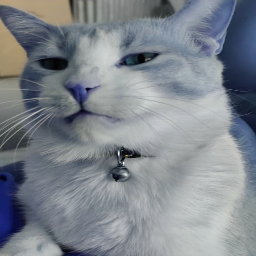

In [70]:
for i in range(85,90):
    print(f" Top#{(i-85)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(85,90): 
    print(f" Top#{(i-85)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(85,90): 
    print(f" Top#{(i-85)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(85,90): 
    print(f" Top#{(i-85)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(85,90): 
    print(f" Top#{(i-85)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
cat2 = dataset[17][0].cpu().numpy()
Image.fromarray(np.rollaxis(cat2, 0,3))

 Top#1 prediction of Resnet18: Siamese_cat -- 16.6%
 Top#2 prediction of Resnet18: Persian_cat -- 4.7%
 Top#3 prediction of Resnet18: Egyptian_cat -- 4.3%
 Top#4 prediction of Resnet18: plastic_bag -- 3.9%
 Top#5 prediction of Resnet18: Chihuahua -- 3.5%
 Top#1 prediction of Alexnet: spotlight -- 100.0%
 Top#2 prediction of Alexnet: obelisk -- 0.0%
 Top#3 prediction of Alexnet: wine_bottle -- 0.0%
 Top#4 prediction of Alexnet: spider_monkey -- 0.0%
 Top#5 prediction of Alexnet: indri -- 0.0%
 Top#1 prediction of GoogleNet: plastic_bag -- 18.0%
 Top#2 prediction of GoogleNet: Egyptian_cat -- 5.8%
 Top#3 prediction of GoogleNet: Siamese_cat -- 3.8%
 Top#4 prediction of GoogleNet: Siberian_husky -- 1.5%
 Top#5 prediction of GoogleNet: teddy -- 1.1%
 Top#1 prediction of ShuffleNet: mask -- 17.2%
 Top#2 prediction of ShuffleNet: ski_mask -- 11.7%
 Top#3 prediction of ShuffleNet: Egyptian_cat -- 5.4%
 Top#4 prediction of ShuffleNet: teddy -- 4.0%
 Top#5 prediction of ShuffleNet: pillow -- 3.

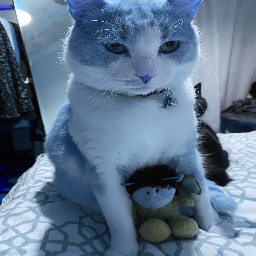

In [71]:
for i in range(90,95):
    print(f" Top#{(i-90)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(90,95): 
    print(f" Top#{(i-90)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(90,95): 
    print(f" Top#{(i-90)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(90,95): 
    print(f" Top#{(i-90)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(90,95): 
    print(f" Top#{(i-90)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
cat3 = dataset[18][0].cpu().numpy()
Image.fromarray(np.rollaxis(cat3, 0,3))

 Top#1 prediction of Resnet18: Egyptian_cat -- 26.3%
 Top#2 prediction of Resnet18: plastic_bag -- 3.0%
 Top#3 prediction of Resnet18: vase -- 2.7%
 Top#4 prediction of Resnet18: beaker -- 2.6%
 Top#5 prediction of Resnet18: tabby -- 2.4%
 Top#1 prediction of Alexnet: spotlight -- 100.0%
 Top#2 prediction of Alexnet: candle -- 0.0%
 Top#3 prediction of Alexnet: digital_clock -- 0.0%
 Top#4 prediction of Alexnet: torch -- 0.0%
 Top#5 prediction of Alexnet: screen -- 0.0%
 Top#1 prediction of GoogleNet: Egyptian_cat -- 28.1%
 Top#2 prediction of GoogleNet: tabby -- 8.3%
 Top#3 prediction of GoogleNet: lynx -- 4.4%
 Top#4 prediction of GoogleNet: tiger_cat -- 2.4%
 Top#5 prediction of GoogleNet: Persian_cat -- 1.6%
 Top#1 prediction of ShuffleNet: lynx -- 37.0%
 Top#2 prediction of ShuffleNet: Egyptian_cat -- 34.3%
 Top#3 prediction of ShuffleNet: kit_fox -- 7.8%
 Top#4 prediction of ShuffleNet: bow_tie -- 1.7%
 Top#5 prediction of ShuffleNet: tabby -- 1.4%


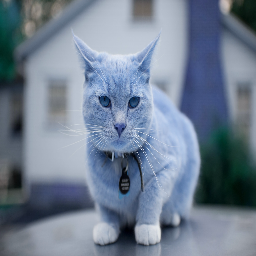

In [72]:
for i in range(95,100):
    print(f" Top#{(i-95)+1} prediction of Resnet18: {rn_cls_labels[i]} -- {rn_probs.ravel()[i]:02.1f}%")
for i in range(95,100): 
    print(f" Top#{(i-95)+1} prediction of Alexnet: {an_cls_labels[i]} -- {an_probs.ravel()[i]:02.1f}%")
for i in range(95,100): 
    print(f" Top#{(i-95)+1} prediction of GoogleNet: {gn_cls_labels[i]} -- {gn_probs.ravel()[i]:02.1f}%")
for i in range(95,100): 
    print(f" Top#{(i-95)+1} prediction of ShuffleNet: {sn_cls_labels[i]} -- {sn_probs.ravel()[i]:02.1f}%")
for i in range(95,10): 
    print(f" Top#{(i-95)+1} prediction of DenseNet: {dn_cls_labels[i]} -- {dn_probs.ravel()[i]:02.1f}%")
cat4 = dataset[19][0].cpu().numpy()
Image.fromarray(np.rollaxis(cat4, 0,3))